<img src="statistical_power.gif" alt="Description of GIF" style="width:500px;"/>


/home/codespace/.local/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


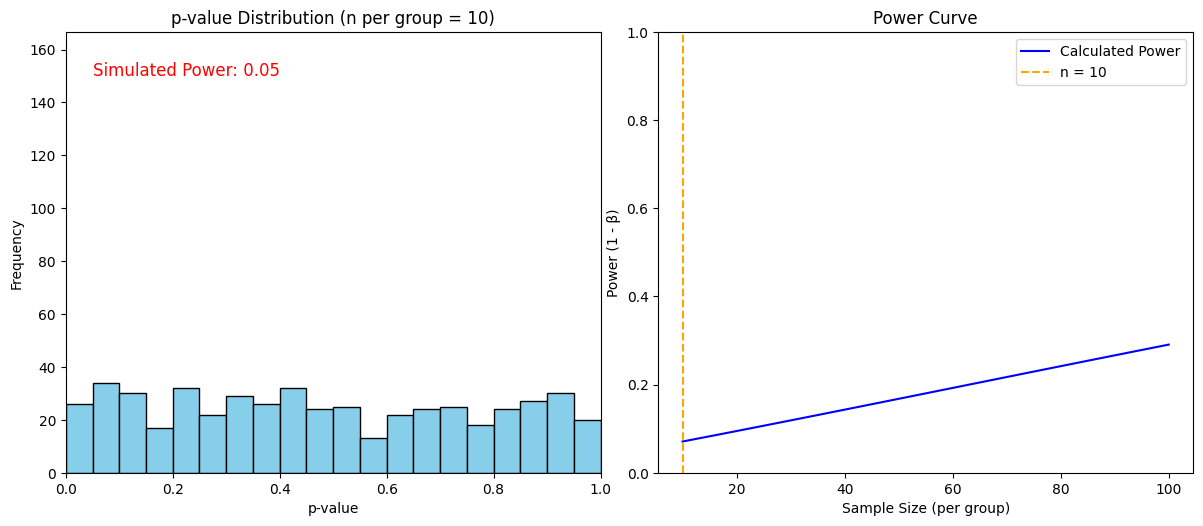

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

# For Jupyter Notebook users, uncomment the following line:
# %matplotlib notebook

# Set simulation parameters
np.random.seed(42)
effect_size = 0.2       # Small effect: difference in means
alpha = 0.05            # Significance level
n_simulations = 500     # Number of experiments per sample size
sample_sizes = np.arange(10, 101, 5)  # Per-group sample sizes from 10 to 100

# Calculate the theoretical power curve using statsmodels
analysis = TTestIndPower()
power_curve = [
    analysis.power(effect_size=effect_size, nobs1=n, alpha=alpha, ratio=1.0, alternative='two-sided')
    for n in sample_sizes
]

# Set up the figure with two subplots:
#   Left: Animated histogram of p-values
#   Right: Power curve with a marker for the current sample size
fig, (ax_hist, ax_power) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram bin settings for p-values
hist_bins = np.linspace(0, 1, 21)  # 20 bins from 0 to 1

def simulate_p_values(n):
    """Simulate many experiments with two independent groups of size n and return p-values."""
    p_values = []
    for _ in range(n_simulations):
        group1 = np.random.normal(loc=0, scale=1, size=n)
        group2 = np.random.normal(loc=effect_size, scale=1, size=n)
        _, p_val = ttest_ind(group1, group2)
        p_values.append(p_val)
    return np.array(p_values)

def update(frame):
    """Update function for the animation; 'frame' corresponds to an index in sample_sizes."""
    current_n = sample_sizes[frame]
    p_vals = simulate_p_values(current_n)
    
    # Update the histogram on the left side
    ax_hist.cla()  # Clear the axis
    counts, bins, patches = ax_hist.hist(p_vals, bins=hist_bins, color='skyblue', edgecolor='black')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_ylim(0, n_simulations/3)
    ax_hist.set_xlabel('p-value')
    ax_hist.set_ylabel('Frequency')
    ax_hist.set_title(f'p-value Distribution (n per group = {current_n})')
    
    # Compute and display the simulated power (proportion of p-values < alpha)
    sim_power = np.mean(p_vals < alpha)
    ax_hist.text(0.05, ax_hist.get_ylim()[1]*0.9, f'Simulated Power: {sim_power:.2f}',
                 fontsize=12, color='red')
    
    # Update the power curve on the right side
    ax_power.cla()  # Clear the axis
    ax_power.plot(sample_sizes, power_curve, 'b-', label='Calculated Power')
    ax_power.set_xlabel('Sample Size (per group)')
    ax_power.set_ylabel('Power (1 - β)')
    ax_power.set_title('Power Curve')
    ax_power.set_ylim(0, 1)
    ax_power.axvline(current_n, color='orange', linestyle='--', label=f'n = {current_n}')
    ax_power.legend()
    
    # Return the patches (not required when blit=False)
    return patches

# Create the animation: one frame per sample size value, updating every 1000ms
ani = animation.FuncAnimation(fig, update, frames=len(sample_sizes), interval=1000, blit=False, repeat=True)

plt.tight_layout()

# For non-interactive environments, you may need to call plt.show()
#plt.show()

# --- For Jupyter Notebook users ---
# To display the animation inline, uncomment the following lines:
from IPython.display import HTML
HTML(ani.to_jshtml())

# Save the animation as a GIF file using the Pillow writer
#ani.save('animation.gif', writer='pillow', fps=1)
